In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("C:/Users/Neeraj/Desktop/Code_ai_dataset.csv")
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [3]:
ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


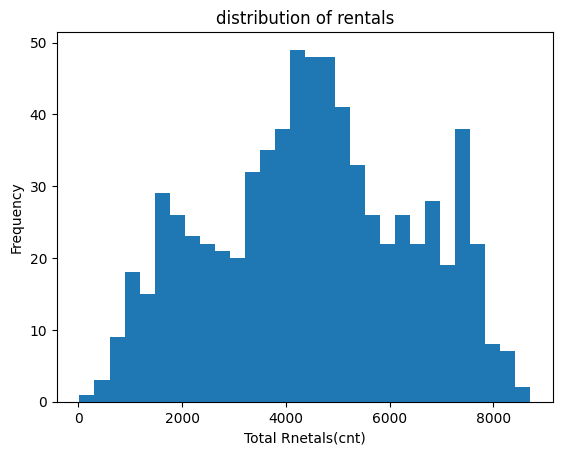

In [4]:
plt.hist(ds['cnt'] , bins =30)
plt.xlabel("Total Rnetals(cnt)")
plt.ylabel("Frequency")
plt.title("distribution of rentals")
plt.show()

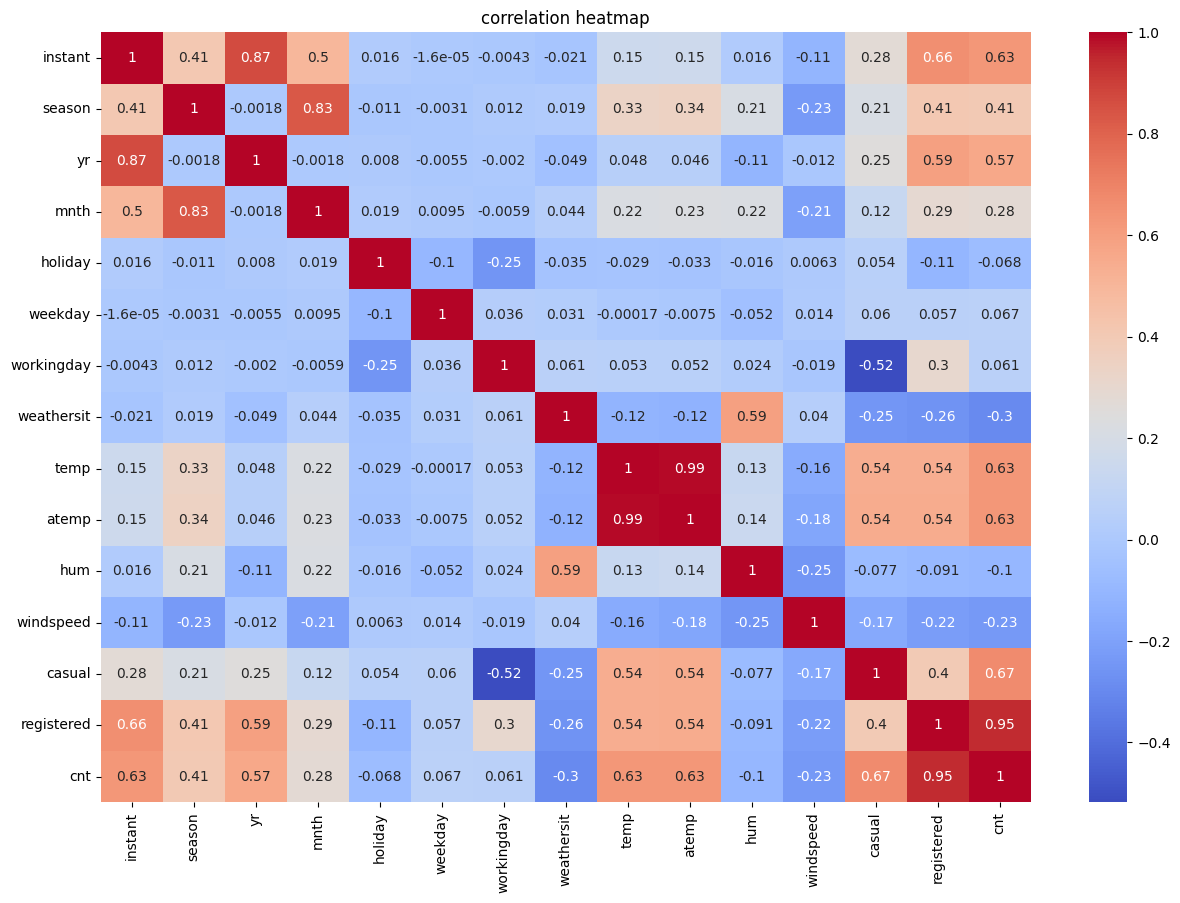

In [5]:
data_set = ds.drop(columns=['dteday'])
  

plt.figure(figsize=(15,10))
sns.heatmap(data_set.corr(), annot=True, cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()


Oberservation 

we see that cnt has postive correlation with registered , casual , atemp  , temp , month , year , season  , instant 
highly positive with registered people 
highly negetive with weathersit


In [6]:
data_set = ds.drop(['dteday', 'casual', 'registered'], axis=1)
data_set.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [7]:
##COnverting  data into categorical features(as december(12) is not better than January(1) as they are not to be treated as numbers)

categorical_features = ['season', 'mnth', 'weekday', 'weathersit']
data_set = pd.get_dummies(ds, columns=categorical_features, drop_first=True)
data_set.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,...,False,False,False,False,False,False,False,True,True,False
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,...,False,False,False,False,False,False,False,False,True,False
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,...,False,False,True,False,False,False,False,False,False,False
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,...,False,False,False,True,False,False,False,False,False,False
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,...,False,False,False,False,True,False,False,False,False,False


In [13]:
## Test Train Split ##
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

data_set = data_set.drop(columns=['dteday'])
X = data_set.drop('cnt', axis=1)
y = data_set['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train.info()
X_test.info()
y_train.info()
y_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 682 to 102
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       584 non-null    int64  
 1   yr            584 non-null    int64  
 2   holiday       584 non-null    int64  
 3   workingday    584 non-null    int64  
 4   temp          584 non-null    float64
 5   atemp         584 non-null    float64
 6   hum           584 non-null    float64
 7   windspeed     584 non-null    float64
 8   casual        584 non-null    int64  
 9   registered    584 non-null    int64  
 10  season_2      584 non-null    bool   
 11  season_3      584 non-null    bool   
 12  season_4      584 non-null    bool   
 13  mnth_2        584 non-null    bool   
 14  mnth_3        584 non-null    bool   
 15  mnth_4        584 non-null    bool   
 16  mnth_5        584 non-null    bool   
 17  mnth_6        584 non-null    bool   
 18  mnth_7        584 non-null    boo

In [15]:
## MOdel Training and Evaluation ##

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return {"MAE": mae, "MSE": mse, "R2": r2}
results = {}
    

In [17]:
## Linear Regression ##
lr = LinearRegression()
results['Linear Regression'] = evaluate_model(lr, X_train, X_test, y_train, y_test)

#  Random Forest ##
rf = RandomForestRegressor(random_state=42)
results['Random Forest'] = evaluate_model(rf, X_train, X_test, y_train, y_test)

results

{'Linear Regression': {'MAE': 8.42331495559414e-13,
  'MSE': 1.1656262828864885e-24,
  'R2': 1.0},
 'Random Forest': {'MAE': 64.84061224489798,
  'MSE': 10496.637845578232,
  'R2': 0.9973823077361988}}

In [ ]:
## linear Regression performance is better but it is overfitting the data thats why is showing perfect results ##

Observations 

1)We see that by MAE and MSE Linear Regression show Perfect results which is not trustworthy as Casual and Registered add up to total rentals that is cnt 
2) If we want a trustworthy model we can use the Random Forest Model as its predictions are legitimate evem tho mot the best can be made better by optimizing the model